In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset

pypharm_combined_df = pd.merge(mouse_df, clinical_df, how='outer', on="Mouse ID")

# Display the data table for preview
pypharm_combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

combined_mean = pypharm_combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().astype(float)

# Convert to DataFrame
 
combined_mean_df= pd.DataFrame(combined_mean)

# Preview DataFrame

combined_mean_df.reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

combined_sem = pypharm_combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().astype(float)

# Convert to DataFrame
combined_sem_df= pd.DataFrame(combined_sem)

# Preview DataFrame
combined_sem_df.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
#combined_mean_df.set_index('Drug').T.rename_axis(None, axis=1).reset_index(drop=True)

p_combined_mean_df = combined_mean_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')

p_combined_sem_df = combined_sem_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')


# Preview that Reformatting worked

p_combined_mean_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


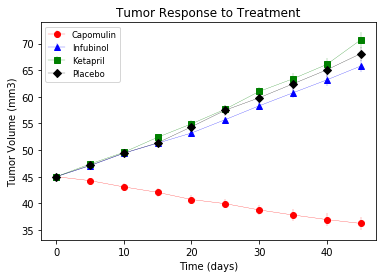

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

ax.grid()

ax.errorbar(p_combined_sem_df.index, p_combined_mean_df['Capomulin'], yerr=p_combined_sem_df['Capomulin'], fmt="-", 
            color="r",marker="o",linewidth=0.25)

ax.errorbar(p_combined_sem_df.index, p_combined_mean_df['Infubinol'], yerr=p_combined_sem_df['Infubinol'], fmt="-", 
            color="b",marker="^",linewidth=0.25)

ax.errorbar(p_combined_sem_df.index, p_combined_mean_df['Ketapril'], yerr=p_combined_sem_df['Ketapril'], fmt="-", 
            color="g",marker="s",linewidth=0.25)

ax.errorbar(p_combined_sem_df.index, p_combined_mean_df['Placebo'], yerr=p_combined_sem_df['Placebo'], fmt="-", 
            color="k",marker="D",linewidth=0.25)




ax.grid()
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Time (days)")

#Sort Legend

handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[1], handles[2],handles[3]]
labels = [labels[0], labels[1], labels[2],labels[3]]

ax.legend(handles,labels,loc="best", fontsize="small", fancybox=True)

ax.set_title("Tumor Response to Treatment")

plt.show()

# Save the Figure

plt.savefig("Tumor Response")


In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

M_combined_mean = pypharm_combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame

M_combined_mean_df = pd.DataFrame(M_combined_mean)
# Preview DataFrame

M_combined_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
M_combined_sem = pypharm_combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame

M_combined_sem_df = pd.DataFrame(M_combined_sem)

# Preview DataFrame

M_combined_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames

pM_combined_mean_df = M_combined_mean_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')

pM_combined_sem_df = M_combined_sem_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')

# Preview that Reformatting worked
pM_combined_sem_df 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


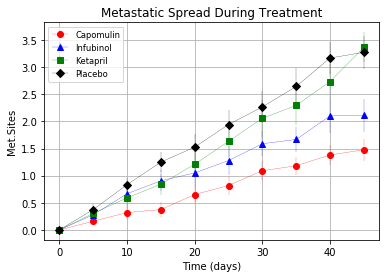

In [10]:
# Generate the Plot (with Error Bars)

fig2, ax2 = plt.subplots()

ax2.grid()

ax2.errorbar(pM_combined_sem_df.index, pM_combined_mean_df['Capomulin'], yerr=pM_combined_sem_df['Capomulin'], fmt="-", 
            color="r",marker="o",linewidth=0.25)

ax2.errorbar(pM_combined_sem_df.index, pM_combined_mean_df['Infubinol'], yerr=pM_combined_sem_df['Infubinol'], fmt="-", 
            color="b",marker="^",linewidth=0.25)

ax2.errorbar(pM_combined_sem_df.index, pM_combined_mean_df['Ketapril'], yerr=pM_combined_sem_df['Ketapril'], fmt="-", 
            color="g",marker="s",linewidth=0.25)


ax2.errorbar(pM_combined_sem_df.index, pM_combined_mean_df['Placebo'], yerr=pM_combined_sem_df['Placebo'], fmt="-", 
            color="k",marker="D",linewidth=0.25)



ax2.set_ylabel("Met.Sites")
ax2.set_xlabel("Time (days)")

# Sort Legend
handles,labels = ax2.get_legend_handles_labels()

handles = [handles[0], handles[1], handles[2],handles[3]]
labels = [labels[0], labels[1], labels[2],labels[3]]

ax2.legend(handles,labels,loc="best", fontsize="small", fancybox=True)

ax2.set_title("Metastatic Spread During Treatment")

#Save Figure
plt.savefig("Metastatic Spread")

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)


mice_count = pypharm_combined_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)

mice_count_df.rename(columns={'Mouse ID':'Mouse Count'}, inplace=True)


# Preview DataFrame

mice_count_df.reset_index().head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
pmice_count_df = mice_count_df.pivot_table('Mouse Count', 'Timepoint', 'Drug')

# Preview the Data Frame

pmice_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


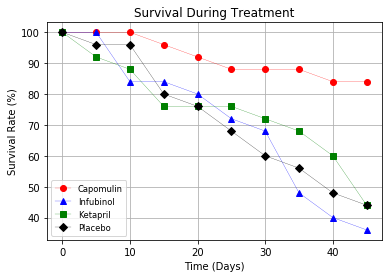

In [13]:
# Generate the Plot (Accounting for percentages)


fig,ax = plt.subplots(1)

ax.grid()

ax.plot(pmice_count_df.index, ((pmice_count_df['Capomulin']/pmice_count_df['Capomulin'][0])*100), color="r",marker="o", linewidth=.25, label="Capomulin")
ax.infubinol, = plt.plot(pmice_count_df.index, ((pmice_count_df['Infubinol']/pmice_count_df['Infubinol'][0])*100), color="b",marker="^", linewidth=.25, label="Infubinol")
ax.ketapril, = plt.plot(pmice_count_df.index, ((pmice_count_df['Ketapril']/pmice_count_df['Ketapril'][0])*100), color="g",marker="s", linewidth=.25, label="Ketapril")
ax.placebo, = plt.plot(pmice_count_df.index, ((pmice_count_df['Placebo']/pmice_count_df['Placebo'][0])*100), color="k",marker="D", linewidth=.25, label="Placebo")

#Title,xlabel,ylabel

ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel ("Survival Rate (%)")

#Sort Legend

handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[1], handles[2],handles[3]]
labels = [labels[0], labels[1], labels[2],labels[3]]

ax.legend(handles,labels,loc="best", fontsize="small", fancybox=True)

#Save the figure
plt.savefig("Mice Survival")
#Show figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

pct_chng= (( (p_combined_mean_df.iloc[-1] - p_combined_mean_df.iloc[0]) /p_combined_mean_df.iloc[0]) *100)


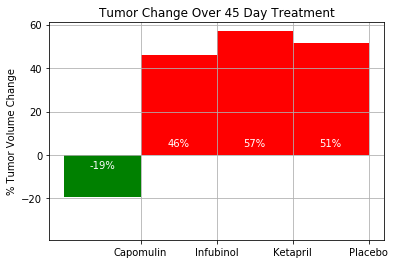

In [15]:

# Splice the data between passing and failing drugs

drug_pct_chng = (pct_chng["Capomulin"], 
               pct_chng["Infubinol"], 
               pct_chng["Ketapril"], 
               pct_chng["Placebo"])

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
ax.grid()
ind = np.arange(len(drug_pct_chng))  
width = 1

ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_ylim([round(drug_pct_chng[0] - 20), round(drug_pct_chng[-1] + 10)])

# Use functions to label the percentages of changes
def label(rects, y):
    for rect in rects: 
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., y,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
for i in ind:
    if drug_pct_chng[i] < 1:
        rects = ax.bar(i,drug_pct_chng[i], width, color='g', label = drug_pct_chng[i])
        y= -7
    else:
        rects = ax.bar(i,drug_pct_chng[i], width, color='r')
        y= 3
    label(rects,y)    


# Save the Figure

plt.savefig("Tumor Change")
# Show the Figure
fig.show()